In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [30]:
df = pd.read_csv(r'C:\Users\Sukanmi\Desktop\Data analysis\edu data\xAPI-Edu-Data.csv')

Step 1: Display All Column Names

In [31]:
print(df.columns)

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')


In [45]:
df.head(2)

,gender,Nationality,Place_Of_Birth,StageID,GradeID,SectionID,Topic,Semester,Relation,raised_hands,Visited_Resources,Announcements_Viewed,Discussion,Parent_Answering_Survey,Parent_School_Satisfaction,Student_Absence_Days,Class
0,M,KW,KUWAIT,LOWERLEVEL,G-04,A,IT,F,FATHER,15,16,2,20,YES,GOOD,UNDER-7,M
1,M,KW,KUWAIT,LOWERLEVEL,G-04,A,IT,F,FATHER,20,20,3,25,YES,GOOD,UNDER-7,M


In [46]:
df["Topic"] = df["Topic"].str.upper()
df["gender"] = df["gender"].str.upper()
df["Nationality"] = df["Nationality"].str.upper()
df["Place_Of_Birth"] = df["Place_Of_Birth"].str.upper()
df["StageID"] = df["StageID"].str.upper()
df["GradeID"] = df["GradeID"].str.upper()
df["SectionID"] = df["SectionID"].str.upper()
df["Semester"] = df["Semester"].str.upper()
df["Relation"] = df["Relation"].str.upper()
df["Parent_Answering_Survey"] = df["Parent_Answering_Survey"].str.upper()
df["Parent_School_Satisfaction"] = df["Parent_School_Satisfaction"].str.upper()
df["Class"] = df["Class"].str.upper()
df["Student_Absence_Days"] = df["Student_Absence_Days"].str.upper()

Step 2: Rename Columns (Fix Typos & Formatting)

In [32]:
df.rename(columns={
    "NationalITy": "Nationality",
    "PlaceofBirth": "Place_Of_Birth",
    "VisITedResources": "Visited_Resources",
    "AnnouncementsView": "Announcements_Viewed",
    "ParentschoolSatisfaction": "Parent_School_Satisfaction",
    "raisedhands": "raised_hands",
    "ParentAnsweringSurvey": "Parent_Answering_Survey",
    "StudentAbsenceDays": "Student_Absence_Days"
}, inplace=True)

print(df.columns)  # Check if changes were applied


Index(['gender', 'Nationality', 'Place_Of_Birth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raised_hands',
       'Visited_Resources', 'Announcements_Viewed', 'Discussion',
       'Parent_Answering_Survey', 'Parent_School_Satisfaction',
       'Student_Absence_Days', 'Class'],
      dtype='object')


In [33]:
# Show basic statistics for numerical columns
print(df.describe())  # Gives mean, min, max, etc.

# Show basic statistics for categorical columns
print(df.describe(include="object"))  # Shows counts of categories


       raised_hands  Visited_Resources  Announcements_Viewed  Discussion
count    480.000000         480.000000            480.000000  480.000000
mean      46.775000          54.797917             37.918750   43.283333
std       30.779223          33.080007             26.611244   27.637735
min        0.000000           0.000000              0.000000    1.000000
25%       15.750000          20.000000             14.000000   20.000000
50%       50.000000          65.000000             33.000000   39.000000
75%       75.000000          84.000000             58.000000   70.000000
max      100.000000          99.000000             98.000000   99.000000
       gender Nationality Place_Of_Birth       StageID GradeID SectionID  \
count     480         480            480           480     480       480   
unique      2          14             14             3      10         3   
top         M          KW         KuwaIT  MiddleSchool    G-02         A   
freq      305         179            18

In [34]:
# Count missing values in each column
print("Missing values:\n", df.isnull().sum())

# Count duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

# Remove duplicate rows (if any)
df = df.drop_duplicates()


Missing values:
 gender                        0
Nationality                   0
Place_Of_Birth                0
StageID                       0
GradeID                       0
SectionID                     0
Topic                         0
Semester                      0
Relation                      0
raised_hands                  0
Visited_Resources             0
Announcements_Viewed          0
Discussion                    0
Parent_Answering_Survey       0
Parent_School_Satisfaction    0
Student_Absence_Days          0
Class                         0
dtype: int64
Number of duplicate rows: 2


In [35]:
# Show unique values in each categorical column
for col in df.select_dtypes(include="object"):
    print(f"{col} unique values: {df[col].unique()}")


gender unique values: ['M' 'F']
Nationality unique values: ['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
Place_Of_Birth unique values: ['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']
StageID unique values: ['lowerlevel' 'MiddleSchool' 'HighSchool']
GradeID unique values: ['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
SectionID unique values: ['A' 'B' 'C']
Topic unique values: ['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
Semester unique values: ['F' 'S']
Relation unique values: ['Father' 'Mum']
Parent_Answering_Survey unique values: ['Yes' 'No']
Parent_School_Satisfaction unique values: ['Good' 'Bad']
Student_Absence_Days unique values: ['Under-7' 'Above-7']
Class unique values: ['M' 'L' 'H']


In [36]:
# Mean, Median, Mode, and Standard Deviation for numerical columns
print("Mean values:")
print(df.mean(numeric_only=True))

print("Median values:")
print(df.median(numeric_only=True))

print("Mode values:")
print(df.mode().iloc[0])  # First mode value

print("Standard Deviation:")
print(df.std(numeric_only=True))


Mean values:
raised_hands            46.887029
Visited_Resources       54.974895
Announcements_Viewed    38.014644
Discussion              43.410042
dtype: float64
Median values:
raised_hands            50.0
Visited_Resources       65.0
Announcements_Viewed    33.0
Discussion              39.5
dtype: float64
Mode values:
gender                                   M
Nationality                             KW
Place_Of_Birth                      KuwaIT
StageID                       MiddleSchool
GradeID                               G-02
SectionID                                A
Topic                                   IT
Semester                                 F
Relation                            Father
raised_hands                          70.0
Visited_Resources                       80
Announcements_Viewed                  12.0
Discussion                            70.0
Parent_Answering_Survey                Yes
Parent_School_Satisfaction            Good
Student_Absence_Days            

In [13]:
# Find most common values in categorical columns
for col in df.select_dtypes(include="object"):
    print("Most common value in", col, ":", df[col].mode()[0])


Most common value in gender : M
Most common value in NationalITy : KW
Most common value in PlaceofBirth : KuwaIT
Most common value in StageID : MiddleSchool
Most common value in GradeID : G-02
Most common value in SectionID : A
Most common value in Topic : IT
Most common value in Semester : F
Most common value in Relation : Father
Most common value in ParentAnsweringSurvey : Yes
Most common value in ParentschoolSatisfaction : Good
Most common value in StudentAbsenceDays : Under-7
Most common value in Class : M


In [14]:
# Check correlation between numerical columns
print("Correlation Matrix:")
print(df.corr(numeric_only=True))


Correlation Matrix:
                   raisedhands  VisITedResources  AnnouncementsView  \
raisedhands           1.000000          0.690635           0.642730   
VisITedResources      0.690635          1.000000           0.592948   
AnnouncementsView     0.642730          0.592948           1.000000   
Discussion            0.337300          0.238790           0.415355   

                   Discussion  
raisedhands          0.337300  
VisITedResources     0.238790  
AnnouncementsView    0.415355  
Discussion           1.000000  


In [15]:
# Set style for colorful plots
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

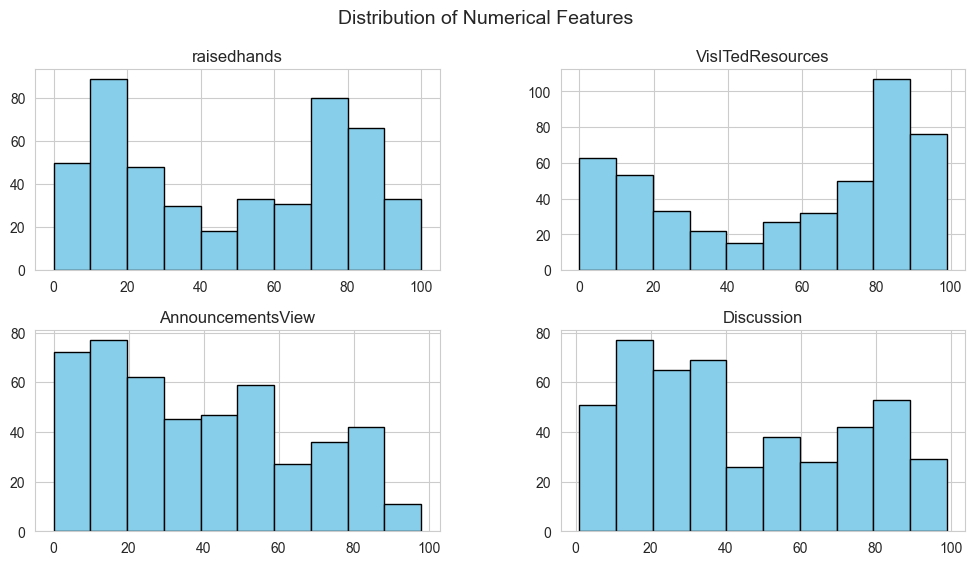

In [16]:
df.hist(figsize=(12, 6), color="skyblue", edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()


C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_13028\1311847197.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="gender", data=df, palette="coolwarm")


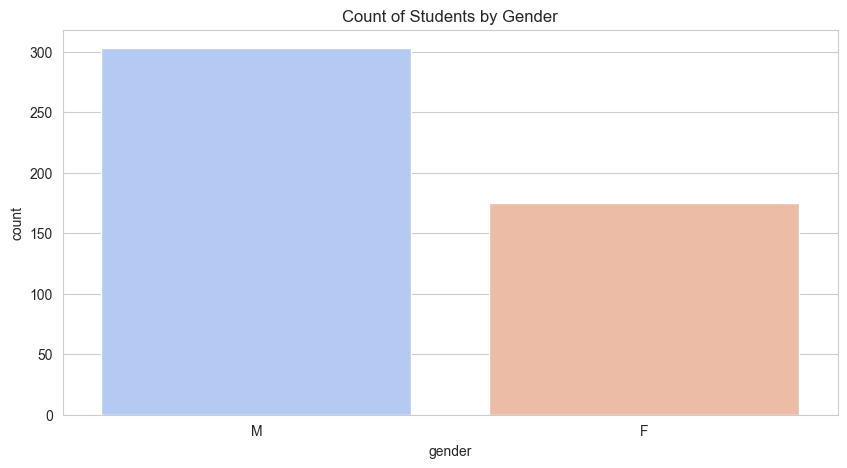

C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_13028\1311847197.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=df, palette="viridis")


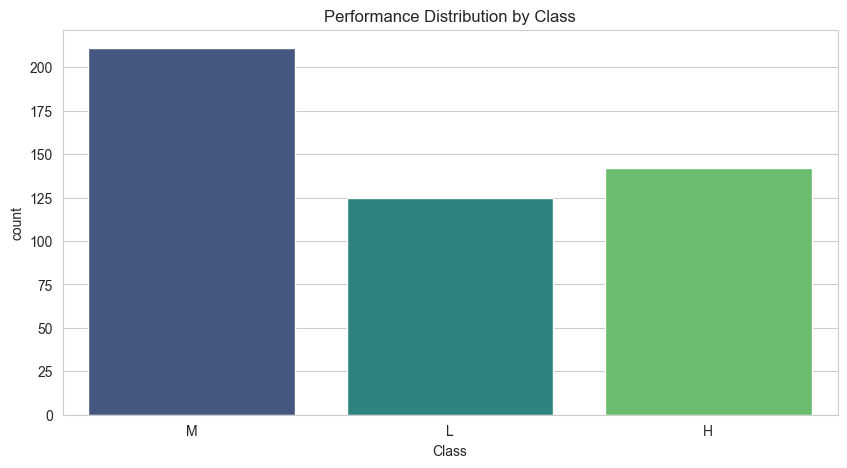

In [18]:
# Plot count of students by gender
sns.countplot(x="gender", data=df, palette="coolwarm")
plt.title("Count of Students by Gender")
plt.show()

# Plot count of students by Class (Performance Category)
sns.countplot(x="Class", data=df, palette="viridis")
plt.title("Performance Distribution by Class")
plt.show()


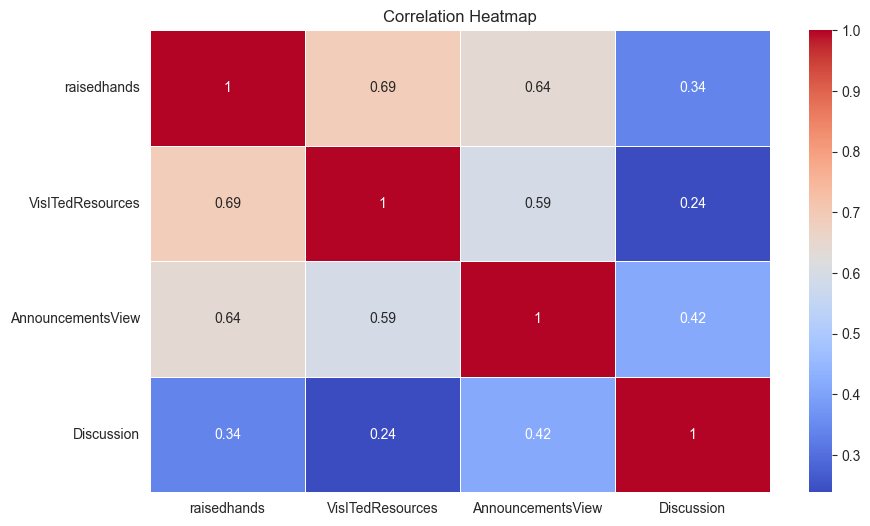

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_13028\3703362972.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="StudentAbsenceDays", y="raisedhands", data=df, palette="pastel")


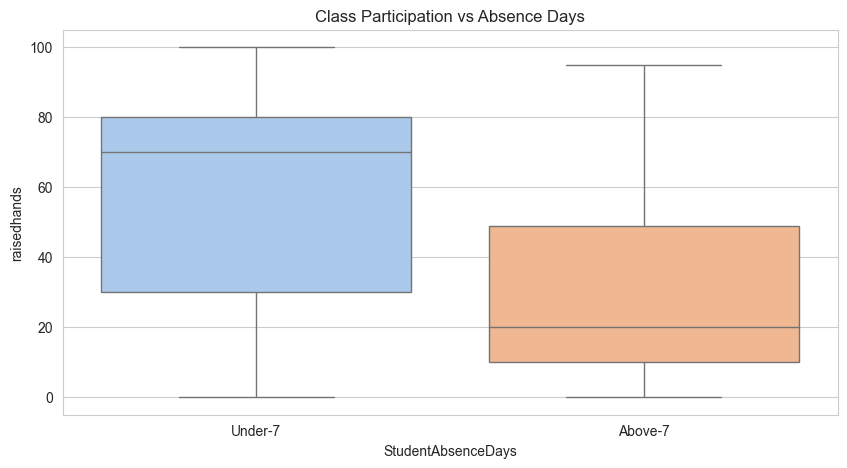

In [20]:
sns.boxplot(x="StudentAbsenceDays", y="raisedhands", data=df, palette="pastel")
plt.title("Class Participation vs Absence Days")
plt.show()


1. Gender-Based Analysis
We’ll check how gender affects participation and performance

C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_13028\771444563.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="gender", data=df, palette="coolwarm")


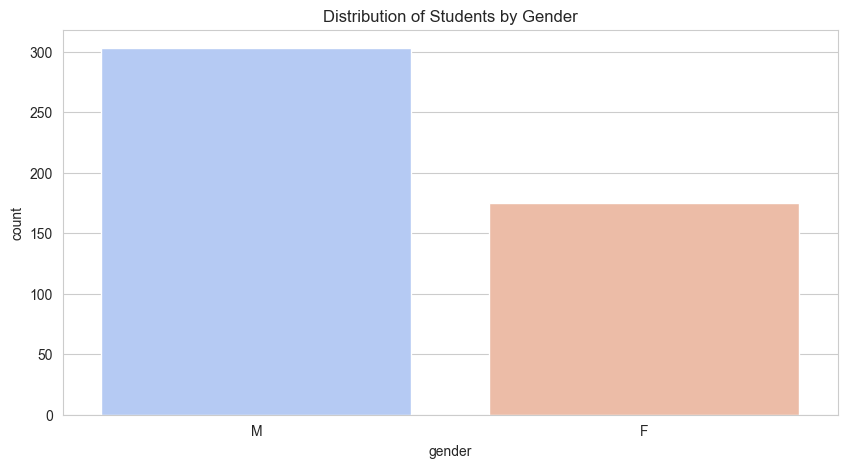

C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_13028\771444563.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="gender", y="raisedhands", data=df, palette="pastel")


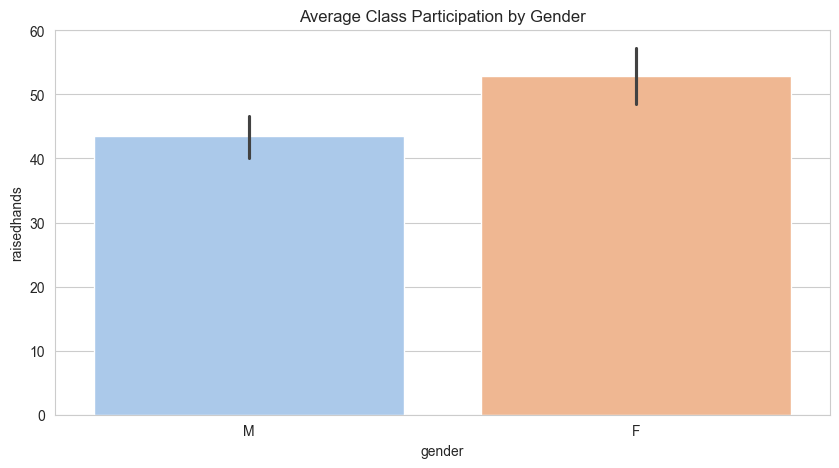

In [21]:
# Gender distribution
sns.countplot(x="gender", data=df, palette="coolwarm")
plt.title("Distribution of Students by Gender")
plt.show()

# Average raised hands by gender
sns.barplot(x="gender", y="raisedhands", data=df, palette="pastel")
plt.title("Average Class Participation by Gender")
plt.show()


Insight:

If one gender participates more, it may indicate different learning engagement styles

2. Performance Category Distribution
We’ll analyze how students are distributed across performance categories

C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_13028\1455857175.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=df, palette="viridis")


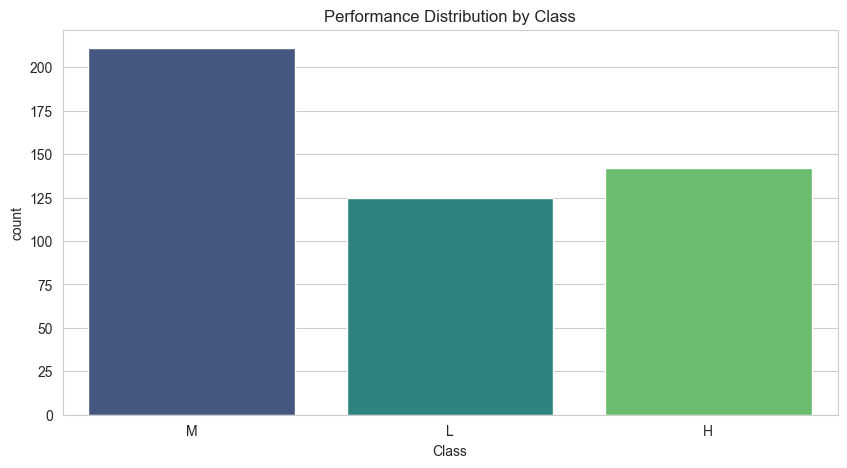

In [22]:
sns.countplot(x="Class", data=df, palette="viridis")
plt.title("Performance Distribution by Class")
plt.show()


Insight:

If too many students are in the lowest category, interventions like extra tutoring may be needed.

3. Absenteeism vs. Participation
We’ll check if students with high absences participate less

C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_13028\3703362972.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="StudentAbsenceDays", y="raisedhands", data=df, palette="pastel")


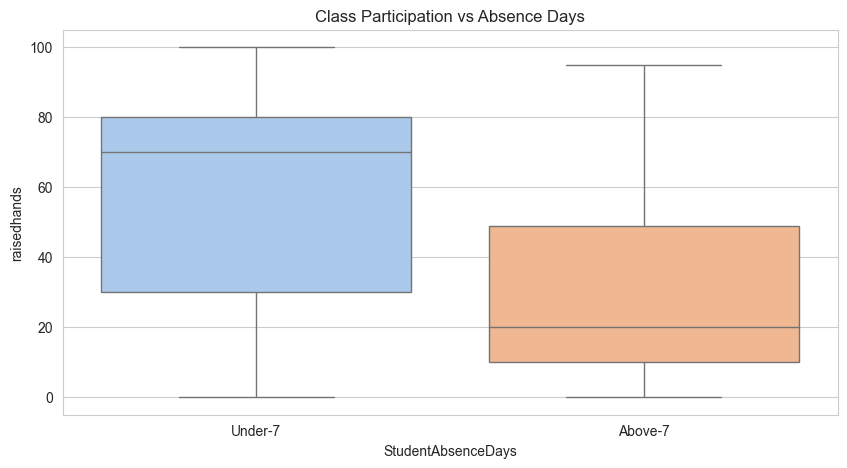

In [23]:
sns.boxplot(x="StudentAbsenceDays", y="raisedhands", data=df, palette="pastel")
plt.title("Class Participation vs Absence Days")
plt.show()


Insight:

If students with more absences participate less, attendance policies may need improvement

4. Correlation Analysis (Understanding Key Relationships)
We’ll check how different features are related

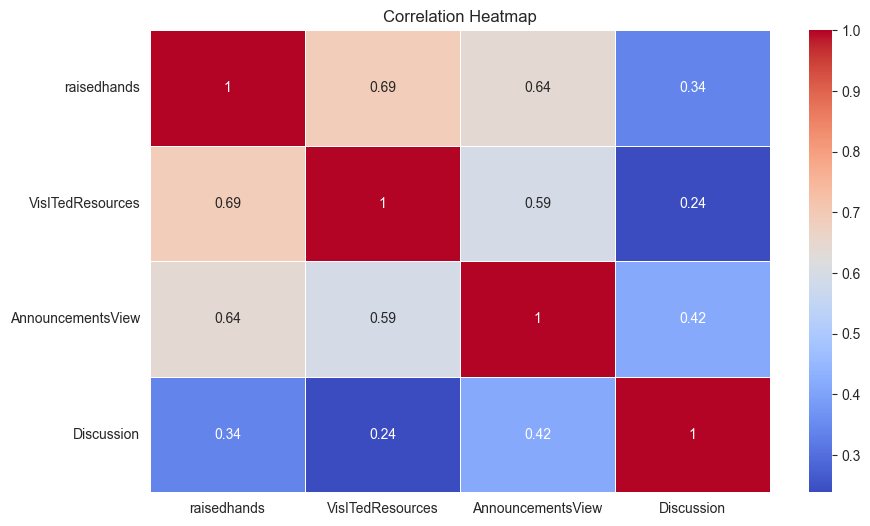

In [24]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


Insight:

Strong correlations help identify key factors affecting performance.
Example: If visited resources highly correlates with performance, digital learning could be enhanced.

5. Parental Involvement & Student Success
We’ll check if parental engagement improves student performance.

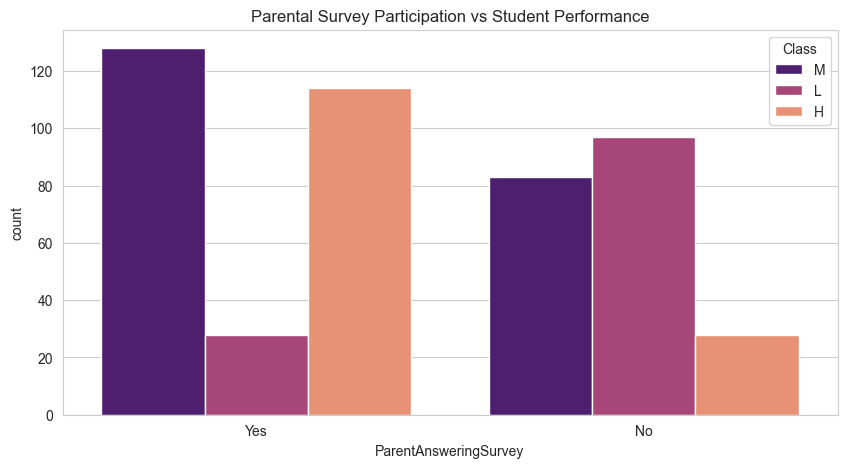

In [25]:
sns.countplot(x="ParentAnsweringSurvey", hue="Class", data=df, palette="magma")
plt.title("Parental Survey Participation vs Student Performance")
plt.show()


Insight:

If students with engaged parents perform better, schools should increase parental involvement.

In [37]:
for col in df.select_dtypes(include="object"):
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print("-" * 50)


Unique values in gender:
['M' 'F']
--------------------------------------------------
Unique values in Nationality:
['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
--------------------------------------------------
Unique values in Place_Of_Birth:
['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']
--------------------------------------------------
Unique values in StageID:
['lowerlevel' 'MiddleSchool' 'HighSchool']
--------------------------------------------------
Unique values in GradeID:
['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
--------------------------------------------------
Unique values in SectionID:
['A' 'B' 'C']
--------------------------------------------------
Unique values in Topic:
['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geol

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Step 1: Encode Categorical Features
We need to convert text into numbers for machine learning.

In [48]:
df_encoded = df.copy()  # Create a copy of the dataset

# Encode categorical columns
label_encoders = {}
for col in df_encoded.select_dtypes(include="object"):  
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])  
    label_encoders[col] = le  # Store encoders for future decoding


Step 2 Define Features & Target
Features (X): Everything except Class
Target (y): The Class column (student performance)

In [49]:
X = df_encoded.drop(columns=["Class"])  # Features  
y = df_encoded["Class"]  # Target


Step 3: Train-Test Split (80% Train, 20% Test)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 4: Train a Machine Learning Model (Random Forest)

In [51]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)  # Train the model


RandomForestClassifier(random_state=42)

Step 5: Make Predictions & Evaluate Performance

Accuracy: 0.8229166666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.88      0.85      0.87        27
           2       0.82      0.80      0.81        45

    accuracy                           0.82        96
   macro avg       0.82      0.83      0.83        96
weighted avg       0.82      0.82      0.82        96



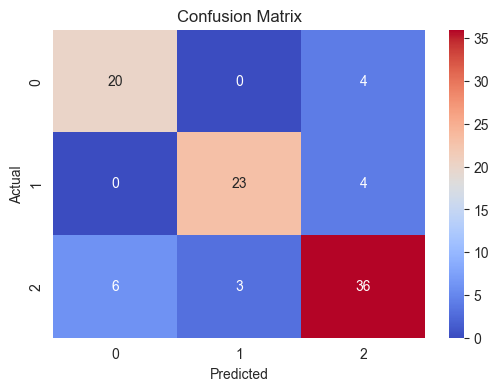

In [52]:
y_pred = model.predict(X_test)

# Model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report (Precision, Recall, F1-score)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="coolwarm")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Step 1: Check Feature Importance
Random Forest allows us to see which features are most important for predictions.

C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_13028\1870145706.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="coolwarm")


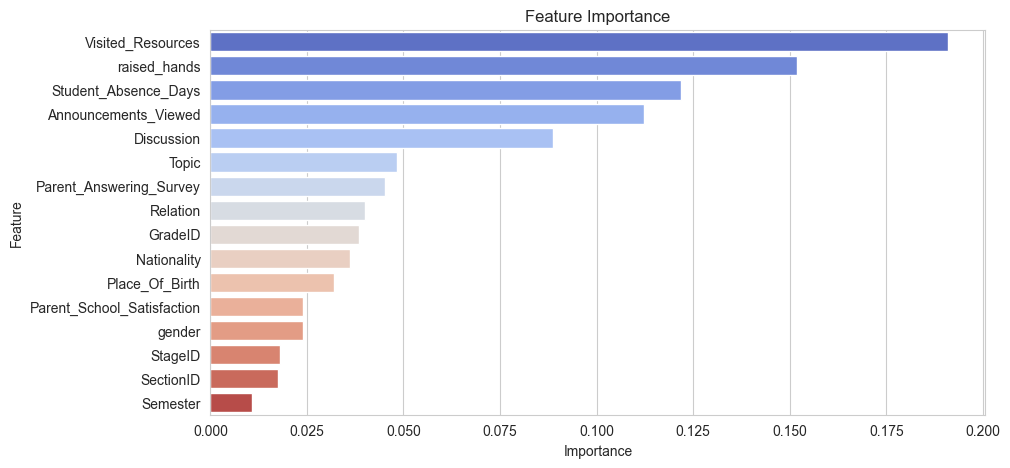

In [53]:
# Get feature importance
importances = model.feature_importances_

# Create a DataFrame to visualize importance
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="coolwarm")
plt.title("Feature Importance")
plt.show()


Step 2: Remove Unimportant Features & Retrain the Model

In [54]:
# Select only important features (Remove less useful ones)
selected_features = feature_importance_df[feature_importance_df["Importance"] > 0.02]["Feature"].tolist()
X_selected = df_encoded[selected_features]

# Split again
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train new model
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check accuracy again
accuracy = accuracy_score(y_test, y_pred)
print("New Accuracy:", accuracy)


New Accuracy: 0.8541666666666666


Step 3: Hyperparameter Tuning (Grid Search for Best Settings)
Instead of manually choosing parameters, we let the computer find the best ones

In [55]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train model with best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# New accuracy
new_accuracy = accuracy_score(y_test, y_pred)
print("Tuned Model Accuracy:", new_accuracy)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Tuned Model Accuracy: 0.8541666666666666


In [56]:
import joblib

# Save the trained model
joblib.dump(best_model, "student_performance_model.pkl")

print("Model saved successfully!")


Model saved successfully!


In [57]:
# Load the saved model
loaded_model = joblib.load("student_performance_model.pkl")

# Example: Make predictions on new data
new_predictions = loaded_model.predict(X_test)
print(new_predictions)


[2 1 2 1 1 1 0 0 2 2 1 2 0 0 1 2 2 0 1 2 0 2 1 2 2 1 2 0 0 2 2 0 2 2 1 1 0
 2 2 0 0 2 1 1 0 2 0 1 0 2 0 2 2 0 2 2 2 0 2 2 2 2 2 1 1 0 2 2 2 2 1 1 2 1
 0 2 0 1 0 2 0 1 2 2 0 1 2 2 1 0 2 1 1 1 0 1]


📌 Step 1: Export Cleaned Data for Power BI
Since Power BI works best with CSV or Excel files, let’s save the cleaned dataset.

In [58]:
df_encoded.to_csv("student_performance_cleaned.csv", index=False)
print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!


✅ This will save a file student_performance_cleaned.csv, which you can import into Power BI.